### 1. [What are the most popular coding language over time?](#language)
### 2. [What are the job satisfication observe over time?](#jobsatisfy)
### 3. [What are the top 10 factors that affect salary over time?](#10factors)

In [73]:
#load python packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from datetime import datetime 
import seaborn as sns
import re
%matplotlib inline

In [2]:
#load dataset for analysis
#df_2011 = pd.read_csv('C:/Users/yuqiu/Downloads/stack-overflow-developer-survey-2011/2011 Stack Overflow Survey Results.csv')
#df_2012 = pd.read_csv('C:/Users/yuqiu/Downloads/stack-overflow-developer-survey-2012/2012 Stack Overflow Survey Results.csv')
#df_2013 = pd.read_csv('C:/Users/yuqiu/Downloads/stack-overflow-developer-survey-2013/2013 Stack Overflow Survey Responses.csv')
#df_2014 = pd.read_csv('C:/Users/yuqiu/Downloads/stack-overflow-developer-survey-2014/2014 Stack Overflow Survey Responses.csv')
#df_2015 = pd.read_csv('C:/Users/yuqiu/Downloads/stack-overflow-developer-survey-2015/2015 Stack Overflow Developer Survey Responses.csv')
#df_2016 = pd.read_csv('C:/Users/yuqiu/Downloads/stack-overflow-developer-survey-2016/2016 Stack Overflow Survey Results/2016 Stack Overflow Survey Responses.csv')
df_2017 = pd.read_csv('C:/Users/yuqiu/Downloads/stack-overflow-developer-survey-2017/survey_results_public.csv',low_memory=False)
df_2018 = pd.read_csv('C:/Users/yuqiu/Downloads/stack-overflow-developer-survey-2018/survey_results_public.csv',low_memory=False)
df_2019 = pd.read_csv('C:/Users/yuqiu/Downloads/stack-overflow-developer-survey-2019/survey_results_public.csv',low_memory=False)
df_2020 = pd.read_csv('C:/Users/yuqiu/Downloads/stack-overflow-developer-survey-2020/survey_results_public.csv',low_memory=False)
df_2021 = pd.read_csv('C:/Users/yuqiu/Downloads/stack-overflow-developer-survey-2021/survey_results_public.csv',low_memory=False)
schema_2017 = pd.read_csv('C:/Users/yuqiu/Downloads/stack-overflow-developer-survey-2017/survey_results_schema.csv',low_memory=False)
schema_2018 = pd.read_csv('C:/Users/yuqiu/Downloads/stack-overflow-developer-survey-2018/survey_results_schema.csv',low_memory=False)
schema_2019 = pd.read_csv('C:/Users/yuqiu/Downloads/stack-overflow-developer-survey-2019/survey_results_schema.csv',low_memory=False)
schema_2020 = pd.read_csv('C:/Users/yuqiu/Downloads/stack-overflow-developer-survey-2020/survey_results_schema.csv',low_memory=False)
schema_2021 = pd.read_csv('C:/Users/yuqiu/Downloads/stack-overflow-developer-survey-2021/survey_results_schema.csv',low_memory=False)

<a id="language"></a>
# What are the most popular coding language over time?

In [3]:
def item_frequency(col):
    frequency = {}
    for item in col.dropna():
        for element in re.split(';\s|;', item):
            if element in frequency:
                frequency[element] += 1
            else:
                frequency[element] = 1
    df_frequency = pd.DataFrame.from_dict(frequency, orient='index', columns=['frequency'])/col.shape[0]
    return df_frequency

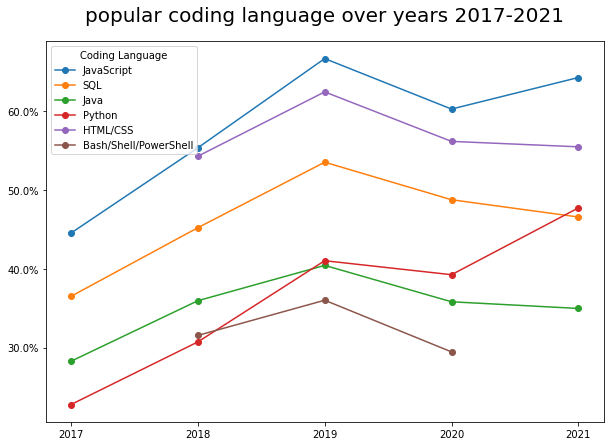

In [4]:
language_df1 = item_frequency(df_2017['HaveWorkedLanguage']).nlargest(6, 'frequency')
language_df2 = item_frequency(df_2018['LanguageWorkedWith']).drop(['CSS'], axis=0).rename(index={'HTML': 'HTML/CSS','Bash/Shell':'Bash/Shell/PowerShell'}).nlargest(6, 'frequency')
language_df3 = item_frequency(df_2019['LanguageWorkedWith']).nlargest(6, 'frequency')
language_df4 = item_frequency(df_2020['LanguageWorkedWith']).nlargest(6, 'frequency')
language_df5 = item_frequency(df_2021['LanguageHaveWorkedWith']).rename(index={'Bash/Shell':'Bash/Shell/PowerShell'}).nlargest(6, 'frequency')
language_df_new = pd.concat([language_df1, language_df2, language_df3, language_df4, language_df5], axis=1)
language_df_new.columns = ['2017','2018','2019','2020', '2021']
#print(df_new)

language_df_transposed = language_df_new.T.dropna(axis=1, thresh=2)
import matplotlib.ticker as mtick
ax1 = language_df_transposed.plot(figsize=(10,7), marker='o')
x = list(range(0,len(language_df_transposed.index)))
ax1.set_xticks(x)
#ax1.set_xticklabels(df_transposed.index)
ax1.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1, decimals=None, symbol='%', is_latex=False))
plt.title('popular coding language over years 2017-2021',fontsize=20,pad=20)
plt.legend(fontsize=10, loc ="upper left", title = 'Coding Language')
plt.show()

As we can see that JavaScript is the most popular coding language since 2017.

saff

<a id="jobsatisfy"></a>
# What are the job satisfaction observe over time?

In [5]:
Job_satisfaction = df_2017['JobSatisfaction'].dropna().to_frame()
Job_satisfaction['year'] = 2017
Job_satisfaction = Job_satisfaction.rename(columns={"JobSatisfaction": "rate"})
Job_satisfaction_total = Job_satisfaction[['rate','year']]

In [6]:
Job_satisfaction = df_2018['JobSatisfaction'].dropna().to_frame()

conditions = [
    (Job_satisfaction['JobSatisfaction'] == 'Extremely satisfied'),
    (Job_satisfaction['JobSatisfaction'] == 'Moderately satisfied'),
    (Job_satisfaction['JobSatisfaction'] == 'Slightly satisfied'),
    (Job_satisfaction['JobSatisfaction'] == 'Neither satisfied nor dissatisfied'),
    (Job_satisfaction['JobSatisfaction'] == 'Slightly dissatisfied'),
    (Job_satisfaction['JobSatisfaction'] == 'Moderately dissatisfied'),
    (Job_satisfaction['JobSatisfaction'] == 'Extremely dissatisfied'),
    ]

values = [10, 8.33, 6.67, 5, 3.33, 1.67, 0]

Job_satisfaction['rate'] = np.select(conditions, values)
Job_satisfaction['year'] = 2018

In [7]:
Job_satisfaction_total = pd.concat([Job_satisfaction_total, Job_satisfaction[['rate','year']]], ignore_index=True, sort=False)

In [8]:
Job_satisfaction = df_2019['JobSat'].dropna().to_frame()

conditions = [
    (Job_satisfaction['JobSat'] == 'Very satisfied'),
    (Job_satisfaction['JobSat'] == 'Slightly satisfied'),
    (Job_satisfaction['JobSat'] == 'Neither satisfied nor dissatisfied'),
    (Job_satisfaction['JobSat'] == 'Slightly dissatisfied'),
    (Job_satisfaction['JobSat'] == 'Very dissatisfied'),
    ]

values = [10,10-2.5,10-2.5*2,10-2.5*3,10-2.5*4]

Job_satisfaction['rate'] = np.select(conditions, values)
Job_satisfaction['year'] = 2019

In [9]:
Job_satisfaction_total = pd.concat([Job_satisfaction_total, Job_satisfaction[['rate','year']]], ignore_index=True, sort=False)

In [10]:
Job_satisfaction = df_2020['JobSat'].dropna().to_frame()

conditions = [
    (Job_satisfaction['JobSat'] == 'Very satisfied'),
    (Job_satisfaction['JobSat'] == 'Slightly satisfied'),
    (Job_satisfaction['JobSat'] == 'Neither satisfied nor dissatisfied'),
    (Job_satisfaction['JobSat'] == 'Slightly dissatisfied'),
    (Job_satisfaction['JobSat'] == 'Very dissatisfied'),
    ]

values = [10,10-2.5,10-2.5*2,10-2.5*3,10-2.5*4]

Job_satisfaction['rate'] = np.select(conditions, values)
Job_satisfaction['year'] = 2020

In [11]:
Job_satisfaction_total = pd.concat([Job_satisfaction_total, Job_satisfaction[['rate','year']]], ignore_index=True, sort=False)

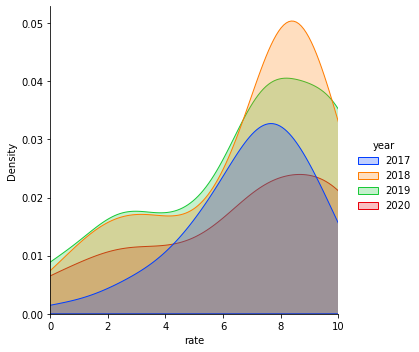

In [14]:
sns.displot(Job_satisfaction_total, x='rate', hue='year',kind='kde', fill=True, bw_adjust=4,
            color=['red','green','yellow','blue'], palette=sns.color_palette('bright')[:4]);
plt.xlim(0,10);

<a id="10factors"></a>
# What are the top 10 factors that affect salary over time?

In [346]:
def clean_data(df):
    '''
    INPUT
    df - pandas dataframe 
    
    OUTPUT
    X - A matrix holding all of the variables you want to consider when predicting the response
    y - the corresponding response vector
    '''
    # Drop rows with missing salary values
    resp = df.columns[np.logical_or(df.columns == 'ConvertedComp', df.columns ==  'Salary')]
    df = df.dropna(subset=resp, axis=0)
    y = df[resp]
    
    #Drop respondent and expected salary columns
    df = df.drop(['Respondent', 'ExpectedSalary', 'Salary', 'ConvertedComp', 'CompTotal'], axis=1, errors='ignore')
    
    # Fill numeric columns with the mean
    num_vars = df.select_dtypes(include=['float', 'int']).columns
    for var in num_vars:
        df[var].fillna((df[var].mean()), inplace=True)
        
    # Dummy the categorical variables
    cat_vars = df.select_dtypes(include=['object']).columns
    for var in cat_vars:
        df2 = df[var].str.split(";").explode().reset_index()
        df2 = df2.pivot(index="index", columns=var, values=var)
        df = pd.concat([df.drop(var, axis=1), df2], axis=1)
    
    
    X = pd.get_dummies(df)
    X = X.dropna(axis=1)
    nunique = X.nunique()
    cols_to_drop = nunique[nunique == 1].index
    X = X.drop(cols_to_drop, axis=1)
    return X, y

In [349]:
print(y.shape[0])
print(y.shape[1])
print(X.shape[0])
print(X.shape[1])

50578
1
50578
977


In [368]:
y

,Salary
1,51000
4,260000
5,30000
6,120000
8,250000
...,...
89946,0
89954,700
89955,0
89960,0


In [369]:
y.isna().sum()

Salary    0
dtype: int64

In [367]:
y.apply(pd.to_numeric, errors='coerce')

,Salary
1,51000.0
4,260000.0
5,30000.0
6,120000.0
8,250000.0
...,...
89946,0.0
89954,700.0
89955,0.0
89960,0.0


In [397]:
y.apply(pd.to_numeric, errors='coerce')

,Salary
1,51000.0
4,260000.0
5,30000.0
6,120000.0
8,250000.0
...,...
89946,0.0
89954,700.0
89955,0.0
89960,0.0


In [399]:
y.apply(pd.to_numeric, errors='coerce')

,Salary
1,51000.0
4,260000.0
5,30000.0
6,120000.0
8,250000.0
...,...
89946,0.0
89954,700.0
89955,0.0
89960,0.0


In [406]:
df[resp]

,Salary
1,51000.0
4,260000.0
5,30000.0
6,120000.0
8,250000.0
...,...
89946,0.0
89954,700.0
89955,0.0
89960,0.0


In [402]:
X

,AssessJob1,AssessJob2,AssessJob3,AssessJob4,AssessJob5,AssessJob6,AssessJob7,AssessJob8,AssessJob9,AssessJob10,...,No_No,Yes_Yes,The survey was an appropriate length_The survey was an appropriate length,The survey was too long_The survey was too long,The survey was too short_The survey was too short,Neither easy nor difficult_Neither easy nor difficult,Somewhat difficult_Somewhat difficult,Somewhat easy_Somewhat easy,Very difficult_Very difficult,Very easy_Very easy
1,1.0,7.0,10.0,8.0,2.0,5.0,4.0,3.0,6.0,9.0,...,0,0,1,0,0,0,0,1,0,0
4,8.0,5.0,7.0,1.0,2.0,6.0,4.0,3.0,10.0,9.0,...,0,0,1,0,0,0,0,1,0,0
5,8.0,5.0,4.0,9.0,1.0,3.0,6.0,2.0,10.0,7.0,...,0,0,1,0,0,0,0,1,0,0
6,5.0,3.0,9.0,4.0,1.0,8.0,2.0,7.0,10.0,6.0,...,1,0,1,0,0,0,0,1,0,0
8,6.0,3.0,7.0,4.0,1.0,5.0,10.0,8.0,9.0,2.0,...,1,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89946,10.0,5.0,7.0,9.0,1.0,4.0,2.0,6.0,3.0,8.0,...,0,0,0,1,0,1,0,0,0,0
89954,2.0,3.0,6.0,8.0,1.0,7.0,5.0,4.0,9.0,10.0,...,0,0,0,1,0,1,0,0,0,0
89955,9.0,1.0,2.0,5.0,3.0,10.0,4.0,7.0,8.0,6.0,...,0,0,1,0,0,1,0,0,0,0
89960,9.0,8.0,5.0,3.0,7.0,6.0,4.0,1.0,10.0,2.0,...,0,0,0,0,0,0,0,0,0,0


In [404]:
df = pd.concat([y.apply(pd.to_numeric, errors='coerce'),X],axis=1)

In [437]:
df

,Salary,AssessJob1,AssessJob2,AssessJob3,AssessJob4,AssessJob5,AssessJob6,AssessJob7,AssessJob8,AssessJob9,...,No_No,Yes_Yes,The survey was an appropriate length_The survey was an appropriate length,The survey was too long_The survey was too long,The survey was too short_The survey was too short,Neither easy nor difficult_Neither easy nor difficult,Somewhat difficult_Somewhat difficult,Somewhat easy_Somewhat easy,Very difficult_Very difficult,Very easy_Very easy
1,51000.0,1.0,7.0,10.0,8.0,2.0,5.0,4.0,3.0,6.0,...,0,0,1,0,0,0,0,1,0,0
4,260000.0,8.0,5.0,7.0,1.0,2.0,6.0,4.0,3.0,10.0,...,0,0,1,0,0,0,0,1,0,0
5,30000.0,8.0,5.0,4.0,9.0,1.0,3.0,6.0,2.0,10.0,...,0,0,1,0,0,0,0,1,0,0
6,120000.0,5.0,3.0,9.0,4.0,1.0,8.0,2.0,7.0,10.0,...,1,0,1,0,0,0,0,1,0,0
8,250000.0,6.0,3.0,7.0,4.0,1.0,5.0,10.0,8.0,9.0,...,1,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89946,0.0,10.0,5.0,7.0,9.0,1.0,4.0,2.0,6.0,3.0,...,0,0,0,1,0,1,0,0,0,0
89954,700.0,2.0,3.0,6.0,8.0,1.0,7.0,5.0,4.0,9.0,...,0,0,0,1,0,1,0,0,0,0
89955,0.0,9.0,1.0,2.0,5.0,3.0,10.0,4.0,7.0,8.0,...,0,0,1,0,0,1,0,0,0,0
89960,0.0,9.0,8.0,5.0,3.0,7.0,6.0,4.0,1.0,10.0,...,0,0,0,0,0,0,0,0,0,0


In [436]:
df[np.squeeze(df[resp]>0)]

,Salary,AssessJob1,AssessJob2,AssessJob3,AssessJob4,AssessJob5,AssessJob6,AssessJob7,AssessJob8,AssessJob9,...,No_No,Yes_Yes,The survey was an appropriate length_The survey was an appropriate length,The survey was too long_The survey was too long,The survey was too short_The survey was too short,Neither easy nor difficult_Neither easy nor difficult,Somewhat difficult_Somewhat difficult,Somewhat easy_Somewhat easy,Very difficult_Very difficult,Very easy_Very easy
1,51000.0,1.0,7.0,10.0,8.0,2.0,5.0,4.0,3.0,6.0,...,0,0,1,0,0,0,0,1,0,0
4,260000.0,8.0,5.0,7.0,1.0,2.0,6.0,4.0,3.0,10.0,...,0,0,1,0,0,0,0,1,0,0
5,30000.0,8.0,5.0,4.0,9.0,1.0,3.0,6.0,2.0,10.0,...,0,0,1,0,0,0,0,1,0,0
6,120000.0,5.0,3.0,9.0,4.0,1.0,8.0,2.0,7.0,10.0,...,1,0,1,0,0,0,0,1,0,0
8,250000.0,6.0,3.0,7.0,4.0,1.0,5.0,10.0,8.0,9.0,...,1,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89926,2000.0,8.0,3.0,5.0,2.0,10.0,1.0,9.0,4.0,7.0,...,0,0,1,0,0,0,0,0,0,1
89928,600.0,3.0,2.0,6.0,1.0,5.0,7.0,9.0,4.0,10.0,...,0,0,1,0,0,0,0,1,0,0
89932,70000.0,9.0,4.0,5.0,2.0,1.0,6.0,8.0,7.0,10.0,...,0,0,0,0,0,0,0,0,0,0
89938,10350.0,9.0,6.0,2.0,1.0,4.0,8.0,7.0,3.0,10.0,...,0,0,0,1,0,0,0,0,0,1


In [ ]:
y.dtype()

In [352]:
r2_scores_test, r2_scores_train, num_feats, results = [], [], [], dict()
cutoff=5000
reduce_X = X.iloc[:, np.where((X.sum() > cutoff) == True)[0]]
num_feats.append(reduce_X.shape[1])

In [364]:
#split the data into train and test
X_train, X_test, y_train, y_test = train_test_split(reduce_X, y, test_size = test_size, random_state=random_state)

TypeError: 'Series' object is not callable

In [365]:
#fit the model and obtain pred response
lm_model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())
lm_model.fit(X_train, y_train)
y_test_preds = lm_model.predict(X_test)
y_train_preds = lm_model.predict(X_train)

ValueError: could not convert string to float: '4000,00'

In [225]:
def find_optimal_lm_mod(X, y, cutoffs, test_size = .30, random_state=42, plot=True):
    '''
    INPUT
    X - pandas dataframe, X matrix
    y - pandas dataframe, response variable
    cutoffs - list of ints, cutoff for number of non-zero values in dummy categorical vars
    test_size - float between 0 and 1, default 0.3, determines the proportion of data as test data
    random_state - int, default 42, controls random state for train_test_split
    plot - boolean, default 0.3, True to plot result

    OUTPUT
    r2_scores_test - list of floats of r2 scores on the test data
    r2_scores_train - list of floats of r2 scores on the train data
    lm_model - model object from sklearn
    X_train, X_test, y_train, y_test - output from sklearn train test split used for optimal model
    '''
    r2_scores_test, r2_scores_train, num_feats, results = [], [], [], dict()
    for cutoff in cutoffs:

        #reduce X matrix
        reduce_X = X.iloc[:, np.where((X.sum() > cutoff) == True)[0]]
        num_feats.append(reduce_X.shape[1])

        #split the data into train and test
        X_train, X_test, y_train, y_test = train_test_split(reduce_X, y, test_size = test_size, random_state=random_state)

        #fit the model and obtain pred response
        lm_model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())
        lm_model.fit(X_train, y_train)
        y_test_preds = lm_model.predict(X_test)
        y_train_preds = lm_model.predict(X_train)

        #append the r2 value from the test set
        r2_scores_test.append(r2_score(y_test, y_test_preds))
        r2_scores_train.append(r2_score(y_train, y_train_preds))
        results[str(cutoff)] = r2_score(y_test, y_test_preds)

    if plot:
        plt.plot(num_feats, r2_scores_test, label="Test", alpha=.5)
        plt.plot(num_feats, r2_scores_train, label="Train", alpha=.5)
        plt.xlabel('Number of Features')
        plt.ylabel('Rsquared')
        plt.title('Rsquared by Number of Features')
        plt.ylim([0, 1])
        plt.legend(loc=1)
        plt.show()

    best_cutoff = max(results, key=results.get)

    #reduce X matrix
    reduce_X = X.iloc[:, np.where((X.sum() > int(best_cutoff)) == True)[0]]
    num_feats.append(reduce_X.shape[1])

    #split the data into train and test
    X_train, X_test, y_train, y_test = train_test_split(reduce_X, y, test_size = test_size, random_state=random_state)

    #fit the model
    #lm_model = LinearRegression()
    lm_model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())
    lm_model.fit(X_train, y_train)

    return r2_scores_test, r2_scores_train, lm_model, X_train, X_test, y_train, y_test

In [226]:
start_time = datetime.now() 

X, y = clean_data(df_2017)

time_elapsed = datetime.now() - start_time 
print('Time elapsed (hh:mm:ss.ms) {}'.format(time_elapsed))
print(X.shape[0])
print(X.shape[1])

Time elapsed (hh:mm:ss.ms) 0:00:52.229968
12891
1364


In [275]:
#cutoffs here pertains to the number of missing values allowed in the used columns.
#Therefore, lower values for the cutoff provides more predictors in the model.
cutoffs = [5000, 3500, 2500, 1000, 100, 50, 30, 25]

r2_scores_test, r2_scores_train, lm_model, X_train, X_test, y_train, y_test = find_optimal_lm_mod(X, y, cutoffs)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [347]:
start_time = datetime.now() 

X, y = clean_data(df_2018)

time_elapsed = datetime.now() - start_time 
print('Time elapsed (hh:mm:ss.ms) {}'.format(time_elapsed))
print(X.shape[0])
print(X.shape[1])

Time elapsed (hh:mm:ss.ms) 0:01:47.938286
50578
977


In [289]:
y.isna().sum()

Salary    251
dtype: int64

In [291]:
X.isna().sum().sum()

0

In [251]:
#reduce X matrix
reduce_X = X.iloc[:, np.where((X.sum() > cutoff) == True)[0]]
num_feats.append(reduce_X.shape[1])



In [252]:
#split the data into train and test
X_train, X_test, y_train, y_test = train_test_split(reduce_X, y, test_size = test_size, random_state=random_state)



In [254]:
#fit the model and obtain pred response
lm_model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

In [271]:
lm_model.fit(X_train, y_train)

ValueError: could not convert string to float: '4000,00'

In [ ]:
y_test_preds = lm_model.predict(X_test)

In [ ]:
y_train_preds = lm_model.predict(X_train)

In [236]:
#cutoffs here pertains to the number of missing values allowed in the used columns.
#Therefore, lower values for the cutoff provides more predictors in the model.
cutoffs = [5000, 3500, 2500, 1000, 100, 50, 30, 25]

r2_scores_test, r2_scores_train, lm_model, X_train, X_test, y_train, y_test = find_optimal_lm_mod(X, y, cutoffs)

ValueError: could not convert string to float: '4000,00'

In [ ]:
start_time = datetime.now() 

X, y = clean_data(df_2019)

time_elapsed = datetime.now() - start_time 
print('Time elapsed (hh:mm:ss.ms) {}'.format(time_elapsed))
print(X.shape[0])
print(X.shape[1])

In [ ]:
#cutoffs here pertains to the number of missing values allowed in the used columns.
#Therefore, lower values for the cutoff provides more predictors in the model.
cutoffs = [5000, 3500, 2500, 1000, 100, 50, 30, 25]

r2_scores_test, r2_scores_train, lm_model, X_train, X_test, y_train, y_test = find_optimal_lm_mod(X, y, cutoffs)

In [ ]:
start_time = datetime.now() 

X, y = clean_data(df_2020)

time_elapsed = datetime.now() - start_time 
print('Time elapsed (hh:mm:ss.ms) {}'.format(time_elapsed))
print(X.shape[0])
print(X.shape[1])

In [ ]:
#cutoffs here pertains to the number of missing values allowed in the used columns.
#Therefore, lower values for the cutoff provides more predictors in the model.
cutoffs = [5000, 3500, 2500, 1000, 100, 50, 30, 25]

r2_scores_test, r2_scores_train, lm_model, X_train, X_test, y_train, y_test = find_optimal_lm_mod(X, y, cutoffs)

In [77]:
df_2017[['Respondent','Salary','ExpectedSalary']]

,Respondent,Salary,ExpectedSalary
0,1,NaN,NaN
1,2,NaN,37500.0
2,3,113750.0,NaN
3,4,NaN,NaN
4,5,NaN,NaN
...,...,...,...
51387,51388,58000.0,NaN
51388,51389,NaN,NaN
51389,51390,NaN,NaN
51390,51391,40000.0,NaN


In [97]:
pd.set_option('display.max_rows', 999)

In [103]:
df_2020['CompTotal','Salary',error='ignore']

SyntaxError: invalid syntax (Temp/ipykernel_14392/1690088657.py, line 1)